# Bank Note Authentication Project

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [2]:
# Dowloading and reading data
df = pd.read_csv("bank_notes.csv")

## I) Data Set Description and Preliminary Analysis:

**Description:** Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images

**Source of Dataset:** https://www.kaggle.com/dsabhis04/bank-note-detection-data-set/notebook
<br>
**Objective:** Use Machine Learning Algrorithms (Supervised & Unsupervised) to predict whether a given banknote is authentic given a number of measures taken from a photograph.
**Features:** 
1. Variance of Wavelet Transformed image (continuous).
2. Skewness of Wavelet Transformed image (continuous).
3. Kurtosis of Wavelet Transformed image (continuous).
4. Entropy of image (continuous).
5. Class (0 for authentic, 1 for inauthentic)

In [3]:
#Check NaN
df.isnull().values.any()

False

In [4]:
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
#Column Names
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Target'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
#Summary Stastiscs
df.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**Note:** Prevalence (proportion of fake notes) is seen to be 44%, indicating that the dataset is quite balanced.

In [9]:
pd.pivot_table(df, index=["Target"], aggfunc=[np.mean])

mean                              
        curtosis   entropy  skewness  variance
Target                                        
0       0.796718 -1.147640  4.256627  2.276686
1       2.148271 -1.246641 -0.993576 -1.868443

In [10]:
pd.pivot_table(df, index=["Target"], aggfunc=[np.std])

std                              
        curtosis   entropy  skewness  variance
Target                                        
0       3.239894  2.125077  5.138792  2.019348
1       5.261811  2.070984  5.404884  1.881183

## II) Visualization

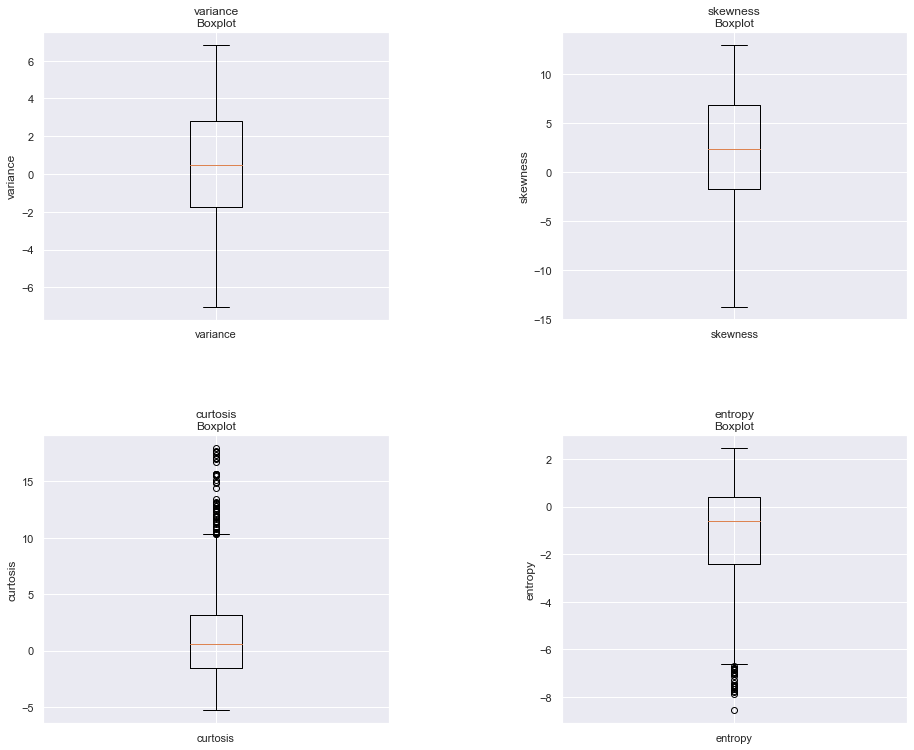

In [11]:
# Distribution of Each Feature: Boxplot
colnames = df.columns

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    x = colnames[i]
    ax[0,i].boxplot(df[str(x)], labels=[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nBoxplot")

for i in range(2,4):
    x = colnames[i]
    ax[1,i-4].boxplot(df[str(x)], labels=[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nBoxplot")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

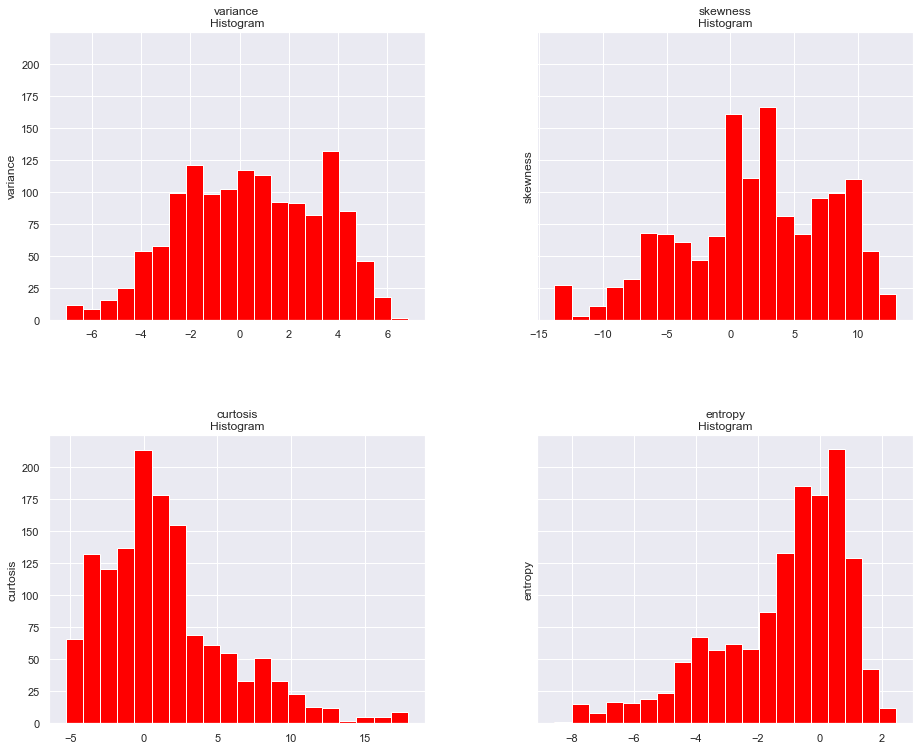

In [12]:
# Distribution of Each Feature: Histogram

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(15,12), sharey=True)
for i in range(2):
    x = colnames[i]
    ax[0,i].hist(df[str(x)], color="red", bins=20)
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nHistogram")

for i in range(2,4):
    x = colnames[i]
    ax[1,i-4].hist(df[str(x)], color="red", bins=20)
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nHistogram")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

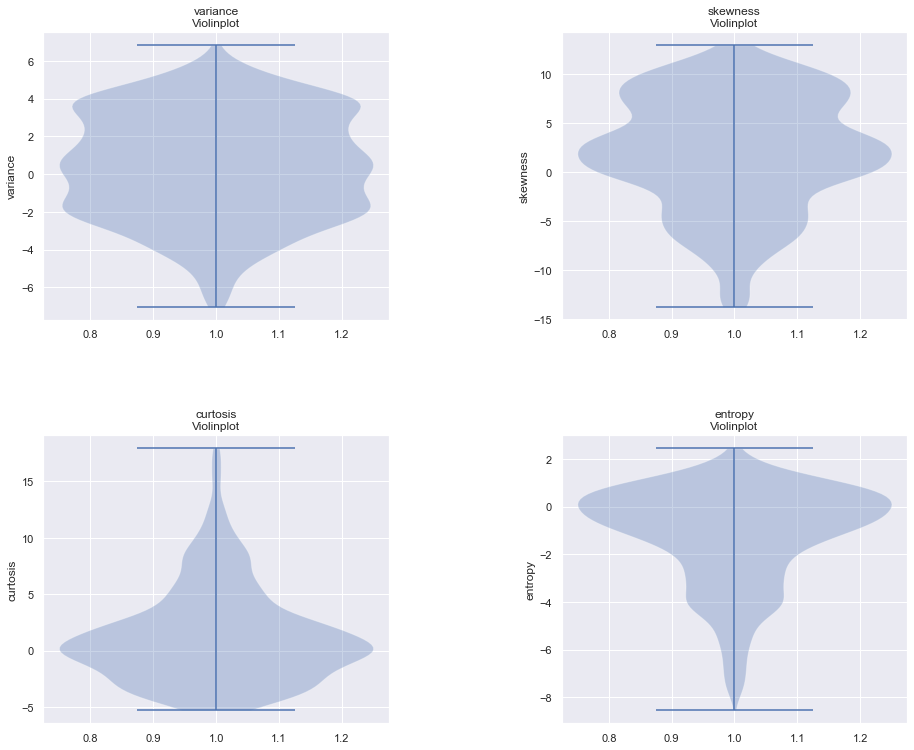

In [13]:
# Distribution of Each Feature: Violinplot

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    x = colnames[i]
    ax[0,i].violinplot(df[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nViolinplot")

for i in range(2,4):
    x = colnames[i]
    ax[1,i-4].violinplot(df[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nViolinplot")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

**Interpretation:** variance and skewness have similar distribution.  Curtosis is skewed towards the right, while entropy is skewed towards the left. All 4 features have median close to 0.

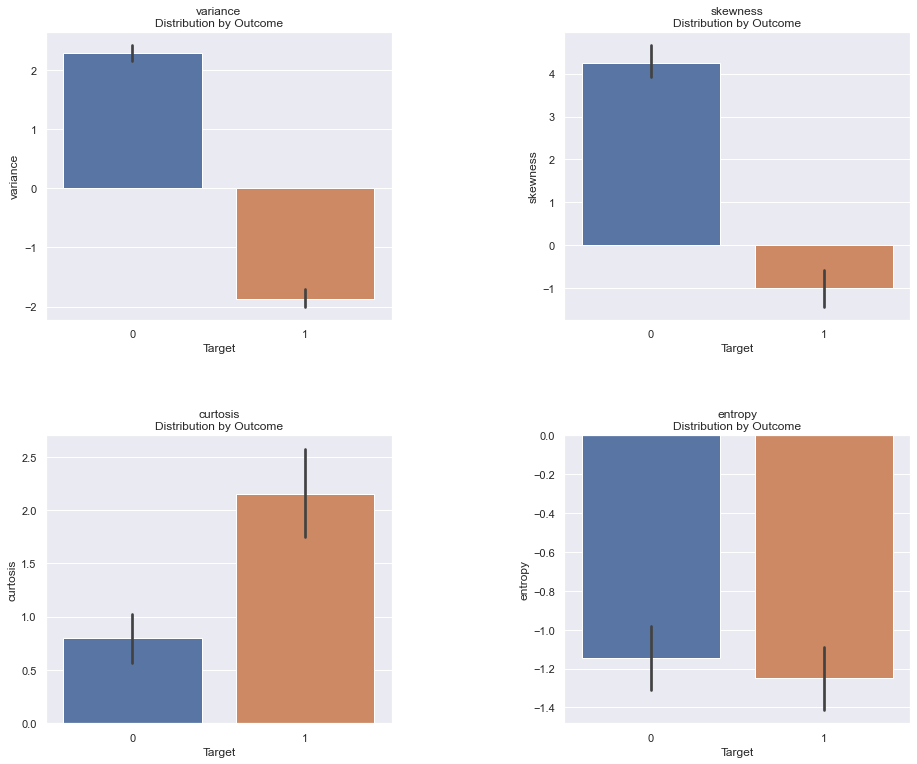

In [14]:
# Distribution of Each Feature By Outcome: Barplot

fig, ax =plt.subplots(2,2, figsize=(15,12))

for i in range(2):
    x = colnames[i]
    sns.barplot(data=df, y=str(x), x="Target", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(2,4):
    x = colnames[i]
    sns.barplot(data=df, y=str(x), x="Target", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

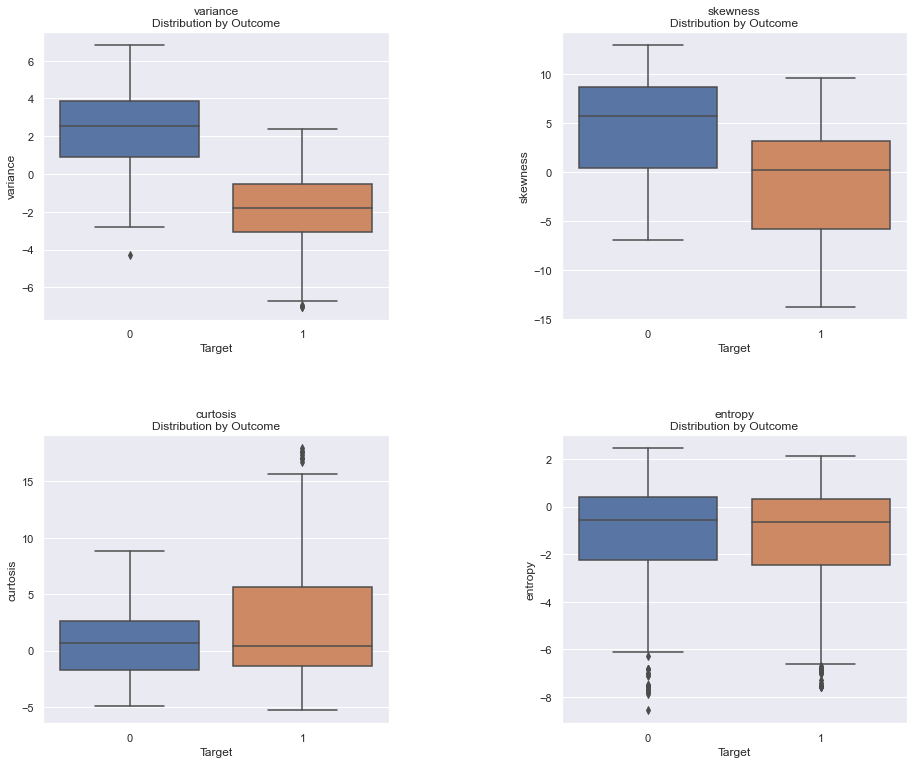

In [15]:
# Distribution of Each Feature By Outcome: Boxplot

fig, ax =plt.subplots(2,2, figsize=(15,12))

for i in range(2):
    x = colnames[i]
    sns.boxplot(data=df, y=str(x), x="Target", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(2,4):
    x = colnames[i]
    sns.boxplot(data=df, y=str(x), x="Target", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

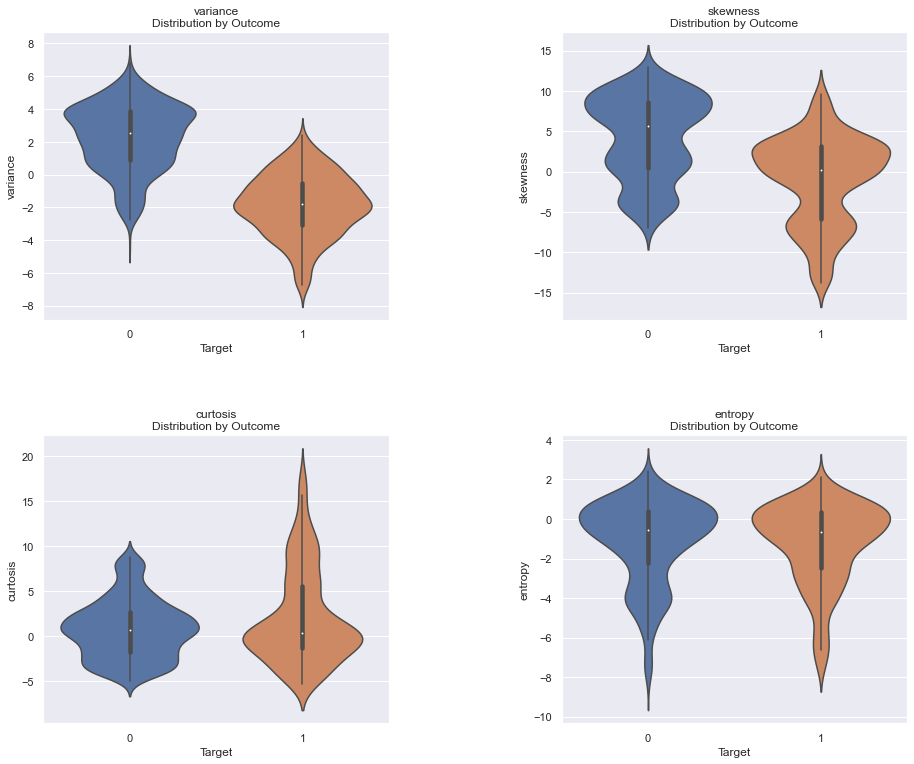

In [16]:
# Distribution of Each Feature By Outcome: Violinplot

fig, ax =plt.subplots(2,2, figsize=(15,12))

for i in range(2):
    x = colnames[i]
    sns.violinplot(data=df, y=str(x), x="Target", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(2,4):
    x = colnames[i]
    sns.violinplot(data=df, y=str(x), x="Target", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

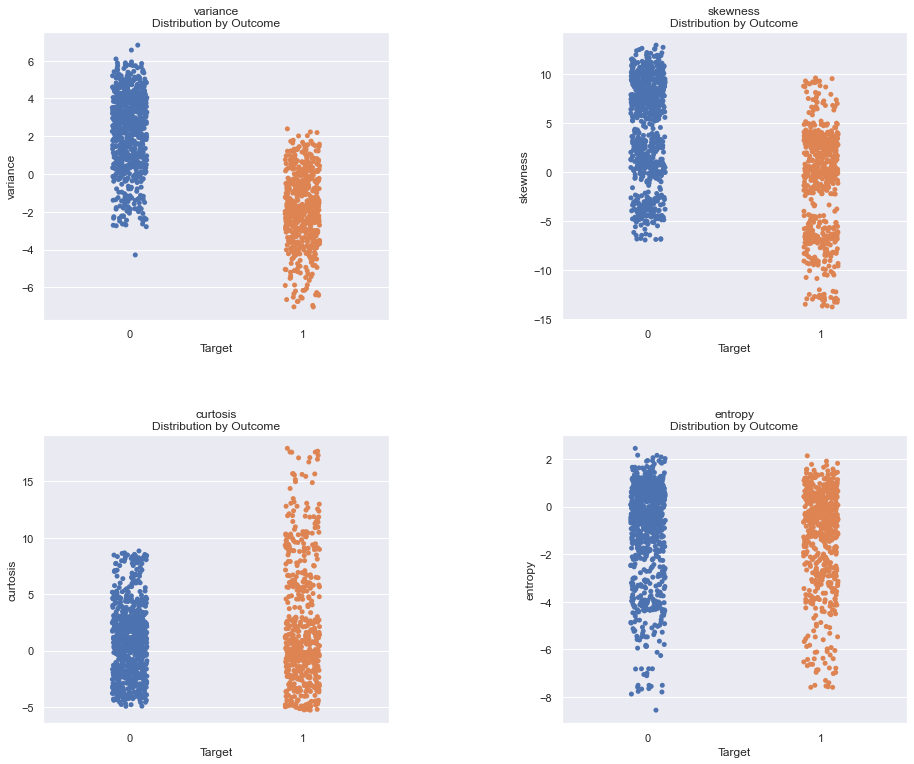

In [17]:
# Distribution of Each Feature By Outcome: Stripplot

fig, ax =plt.subplots(2,2, figsize=(15,12))

for i in range(2):
    x = colnames[i]
    sns.stripplot(data=df, y=str(x), x="Target", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(2,4):
    x = colnames[i]
    sns.stripplot(data=df, y=str(x), x="Target", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

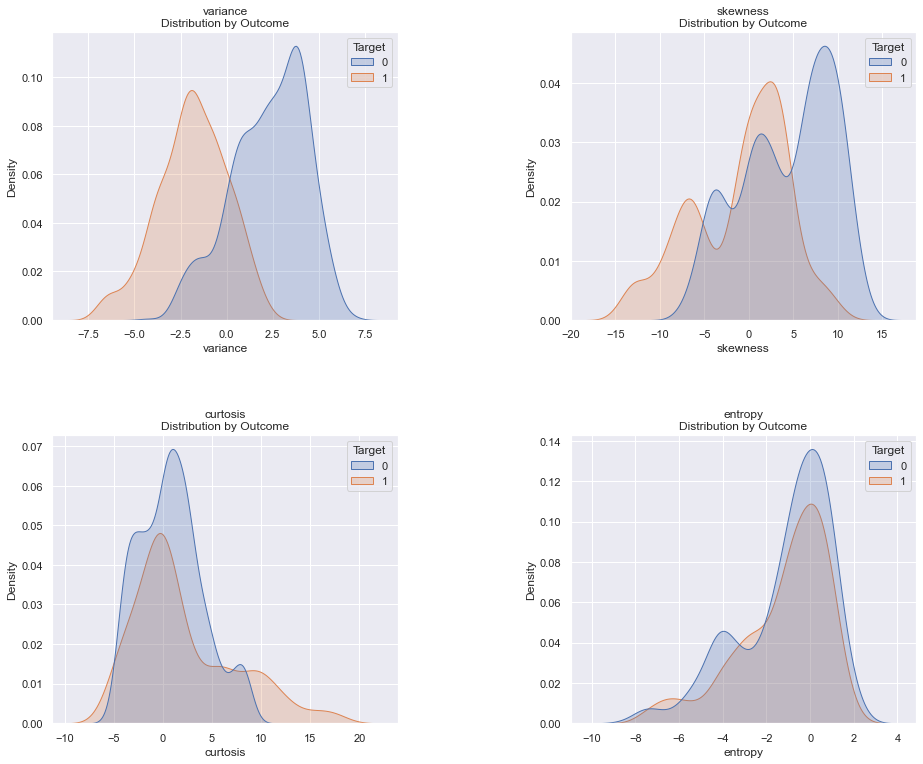

In [18]:
# Distribution of Each Feature By Outcome: Density plot

fig, ax =plt.subplots(2,2, figsize=(15,12))

for i in range(2):
    x = colnames[i]
    sns.kdeplot(data=df, x=str(x), hue="Target", shade=True, ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(2,4):
    x = colnames[i]
    sns.kdeplot(data=df, x=str(x), hue="Target", shade=True, ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

**Interpretation:** The distribution of varaince and skewness is highly depedndent on the outcome, indicating that features may have high importance in making the predictions. The distribution of curtosis is less, but dependent on the outcome, indicating a moderate feature importance. Entropy seems to be similarly distributed across both outcomes, indicating its diminsished importance while making predictions.

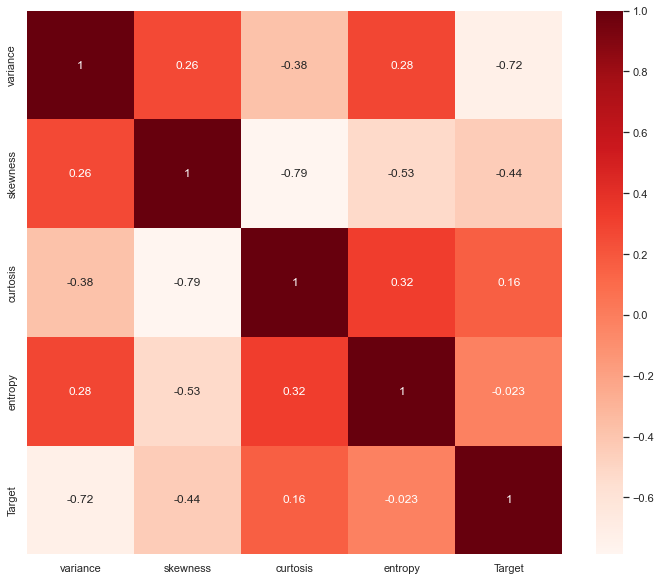

In [19]:
#Using Pearson Correlation to create Correlation heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

For none of the feature pairs, the correlation coeffiecients exceed 0.5, indicating that the features are quite independent to ecah other. The higheset correlation is seen between curtosis and entropy (0.32).

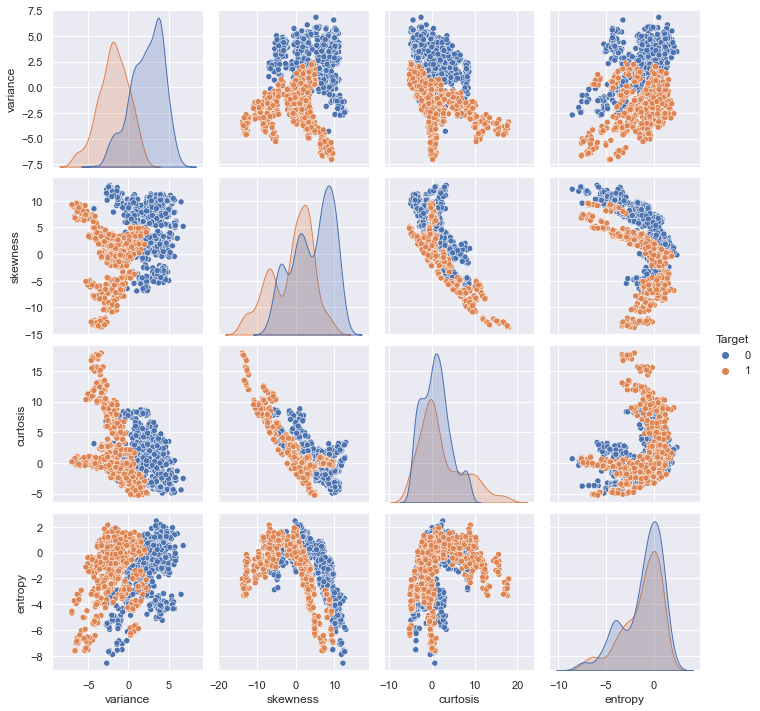

In [20]:
# Pairwise Plotting
# Principal Diagonal Plots- Univaraite Analysis (Density plots) coloured by Outcome
# Other Plots: Bivariate Analysis (Scatter plots) coloured by Outcome
sns.pairplot(data=df, hue="Target")

## III) Prediction Models: Supervised

### 1) KNN Classifier (Stratified Hold Out Validation)

In [21]:
#Importing Necessary Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [22]:
#Split x and y
x=df.drop(['Target'], axis=1)
y=df['Target']

#Scale x
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Split test, train, and validation
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)
train_val_x, valid_x, train_val_y, valid_y=train_test_split(train_x, train_y, random_state=56, stratify=train_y, test_size=1/9)

In [23]:
#Implement knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN

#KNN Classifier for some random k=10 without validation:
clf=KNN(n_neighbors=10)
clf.fit(train_x, train_y)
test_predict=clf.predict(test_x)
print("Recall:", recall_score(test_y, test_predict), 
      "\nF1 Score:", f1_score(test_y, test_predict), 
      "\nAccuracy:", accuracy_score(test_y, test_predict))

Recall: 1.0 
F1 Score: 0.9838709677419354 
Accuracy: 0.9855072463768116


Text(0.5, 1.0, 'Elbow Curve for KNN Classifier')

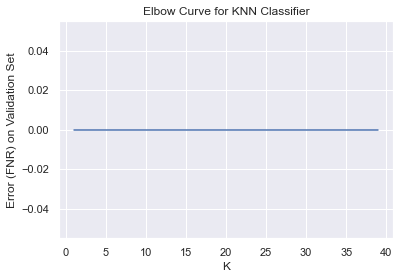

In [24]:
#Elbow Curve (Thresholding) for optimising k (Stratified Hold Out Validation)
def Elbow(K):
    clf=KNN(n_neighbors=K)
    clf.fit(train_val_x, train_val_y)
    valid_predict=clf.predict(valid_x)
    acc = accuracy_score(valid_y, valid_predict)
    return 1-acc
       
k=list(range(1, 40, 2))
er=list(map(Elbow, k))
plt.plot(k, er)
plt.xlabel("K")
plt.ylabel("Error (FNR) on Validation Set")
plt.title("Elbow Curve for KNN Classifier")

Recall: 1.0 
F1 Score: 0.9838709677419354 
Accuracy: 0.9855072463768116
Classification report : 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           0       1.00      0.97      0.99        77

    accuracy                           0.99       138
   macro avg       0.98      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



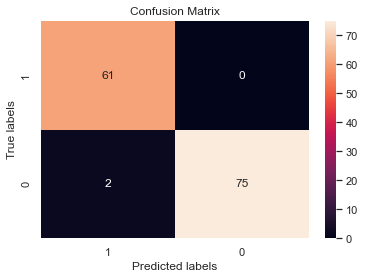

In [25]:
#KNN Classifier on Optimum k:
clf=KNN(n_neighbors=k[er.index(min(er))])
clf.fit(train_x, train_y)
test_predict=clf.predict(test_x)
print("Recall:", recall_score(test_y, test_predict), 
    "\nF1 Score:", f1_score(test_y, test_predict), 
    "\nAccuracy:", accuracy_score(test_y, test_predict))

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict, labels=[1,0])
print('Classification report : \n',matrix)

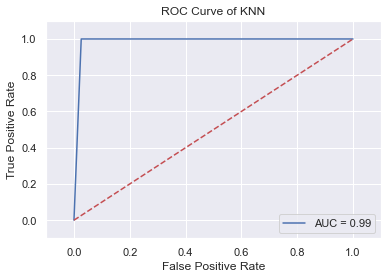

In [26]:
#KNN ROC Curve:
clf=KNN(n_neighbors=5)
clf.fit(train_x, train_y)
test_scores = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

### 2) KNN Classifier (Using k-Fold Cross Validation)

Text(0, 0.5, 'STD_Score_Metric')

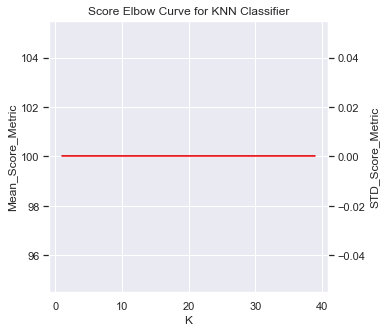

In [27]:
#Implement knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

#7-Fold Cross validation Mean Score Elbow Curve (Thresholding)  for optimising k
def Elbow_cross_val_mean(K):
    score=cross_val_score(KNN(n_neighbors=K), X=train_x, y=train_y, cv=7, scoring='recall')
    return score.mean()*100

#7-Fold Cross validation STD score Elbow Curve (Thresholding) for optimising k
def Elbow_cross_val_std(K):
    score=cross_val_score(KNN(n_neighbors=K), X=train_x, y=train_y, cv=7, scoring='recall')
    return score.std()*1000

#The Elbow Curve Plot
k=list(range(1, 40, 1))
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(k, list(map(Elbow_cross_val_mean, k)))
ax.set_xlabel("K")
ax.set_ylabel("Mean_Score_Metric")
ax.set_title("Score Elbow Curve for KNN Classifier")
ax2=ax.twinx()
ax2.plot(k, list(map(Elbow_cross_val_std, k)), color="red")
ax2.set_ylabel("STD_Score_Metric")

There is no optimum k, as inferred from the above plot. For any random k, e.g. k=3, the accuracy on the valiadtion set remains the same.

Accuracy on Test: 0.9855072463768116 
Recall on Test: 1.0 
F1 Score on Test: 0.9838709677419354
Classification report : 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           0       1.00      0.97      0.99        77

    accuracy                           0.99       138
   macro avg       0.98      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



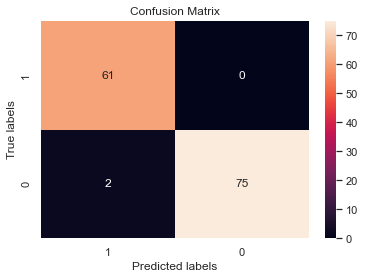

In [28]:
#Taking k=3 for instance:
clf=KNN(n_neighbors=3)
clf.fit(train_x, train_y)
test_predict_cv=clf.predict(test_x)
print( "Accuracy on Test:", accuracy_score(test_y, test_predict_cv),
      "\nRecall on Test:", recall_score(test_y, test_predict_cv),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_cv))

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_cv, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_cv, labels=[1,0])
print('Classification report : \n',matrix)

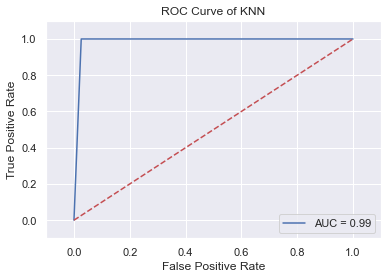

In [29]:
#KNN ROC Curve:
clf=KNN(n_neighbors=3)
clf.fit(train_x, train_y)
test_scores = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

### 3) Multivariate Linear Regression (Stratified Hold Out Validation for Decison Rule)

Text(0.5, 1.0, 'Elbow Curve for Linear Regressor')

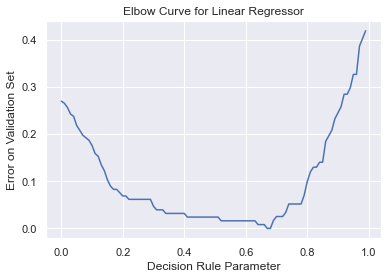

In [30]:
#Implement Linear Regressor
from sklearn.linear_model import LinearRegression as LR

# Creating instance of Logistic Regresssion
lr = LR(normalize=True)

# Fitting the model
lr.fit(train_val_x, train_val_y)

# Predicting over the Validation Set
valid_predict = lr.predict(valid_x)

#Decision Rule (By maximising f1 score on the validation set):
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)
    
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
plt.plot(v, er)
plt.xlabel("Decision Rule Parameter")
plt.ylabel("Error on Validation Set")
plt.title("Elbow Curve for Linear Regressor")

Regression Coefficients:  [-1.97020828 -2.08883114 -2.36473083 -0.01000317]


Text(0.5, 1.0, 'Coefficient plot')

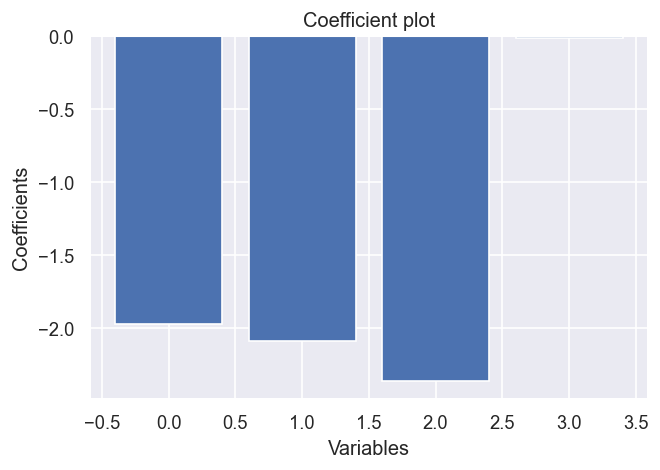

In [31]:
#Using algorithm on entire train (itrain set) set and looking at coefficients
lr = LR()
lr.fit(train_x, train_y)
test_predict = lr.predict(test_x)

print("Regression Coefficients: ", lr.coef_)

plt.figure(dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Accuracy on Test: 0.9710144927536232 
Recall on Test: 0.9344262295081968 
F1 Score on Test: 0.9661016949152543
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.93      0.97        61
           0       0.95      1.00      0.97        77

    accuracy                           0.97       138
   macro avg       0.98      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



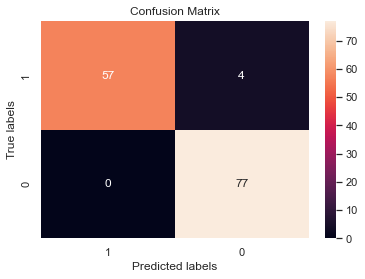

In [32]:
#Making Final Predictions and evaluating performance

#Using Decision Rule with Optimum Parameter:
def func_dec(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec, test_predict))

print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

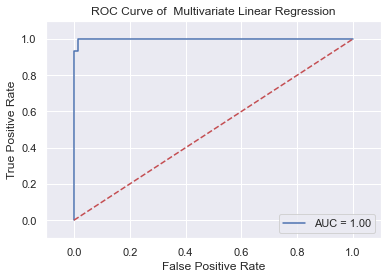

In [33]:
#Linear Regression ROC Curve:
lr = LR()
lr.fit(train_x, train_y)
test_scores = lr.predict(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Multivariate Linear Regression')
plt.show()

Problems with this Model:
1. Theshold is shifting with every new data point added.
2. R=There are also negetive values after performing regression, interpreting which as a a probability is abstract. In, other words, it's difficult to interpret the model in the extrememes. 

Therefore, we use logistic regression.

### 4) Logistic Regression

Regression Coefficients:  [[-10.5841743   -7.83553722  -7.38391218   0.38596931]]


Text(0.5, 1.0, 'Coefficient plot')

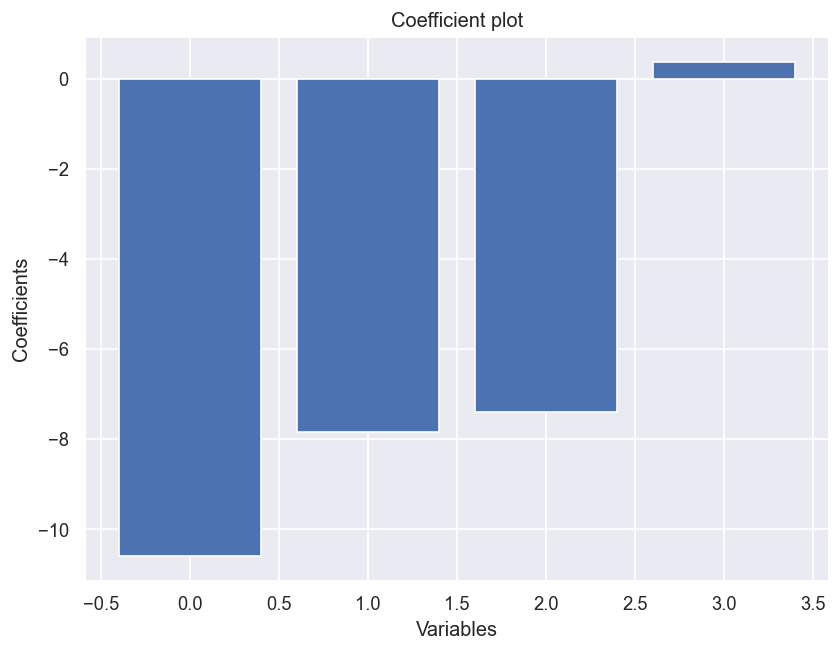

In [34]:
#Implement Logistic Regressor
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import cross_val_score

# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Test Set
test_predict = logreg.predict(test_x)

#Printing the coefficients
print("Regression Coefficients: ", logreg.coef_)

plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Accuracy on Test: 0.9710144927536232 
Recall on Test: 1.0 
F1 Score on Test: 0.9682539682539683
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        61
           0       1.00      0.95      0.97        77

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



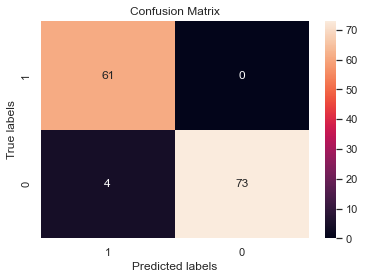

In [35]:
#Making Final Predictions and evaluating performance

print( "Accuracy on Test:", accuracy_score(test_y, test_predict),
      "\nRecall on Test:", recall_score(test_y, test_predict),
     "\nF1 Score on Test:", f1_score(test_y, test_predict))

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict, labels=[1,0])
print('Classification report : \n',matrix)

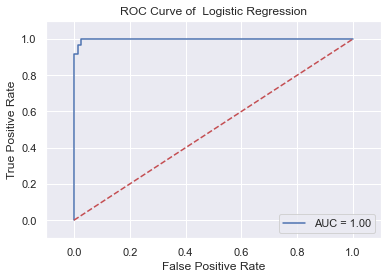

In [36]:
#Logistic Regression ROC Curve:
test_scores = logreg.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Logistic Regression')
plt.show()

### 5) Ridge Regularised Multivariate Linear Regression (Stratified Hold Out Validation for Tuning Decision Parameter and Regularisation Strength)

$$L=\cfrac{1}{n} \sum_{i=1}^n (\hat{Y}_i-Y_i)^2 + \cfrac{\lambda}{n}\sum_{j=1}^m \beta_j^2$$

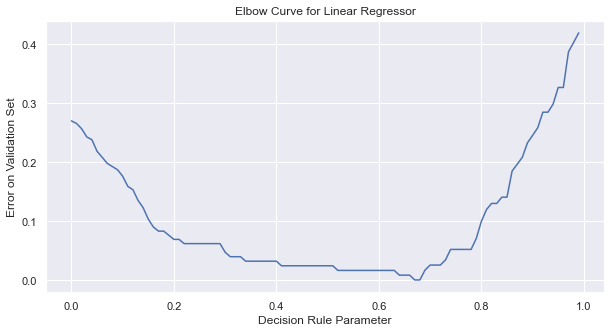

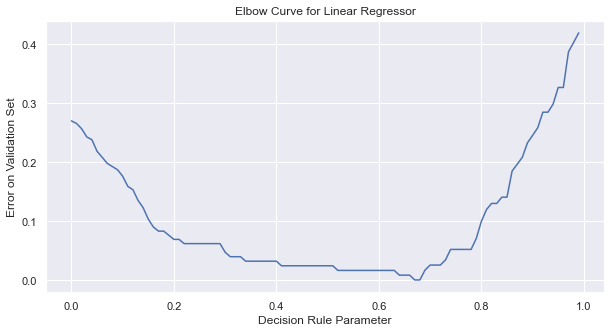

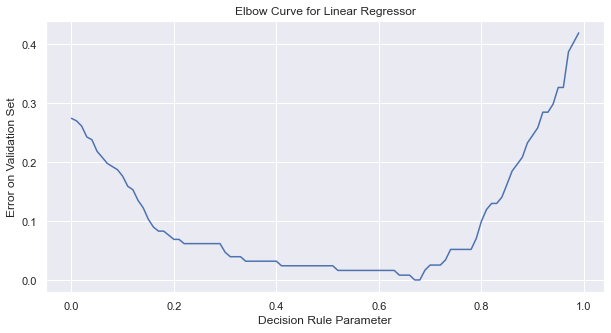

<Figure size 432x288 with 0 Axes>

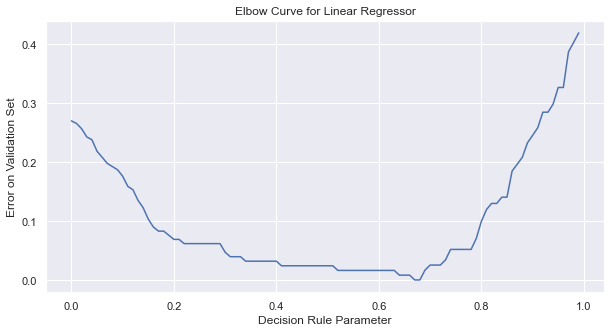

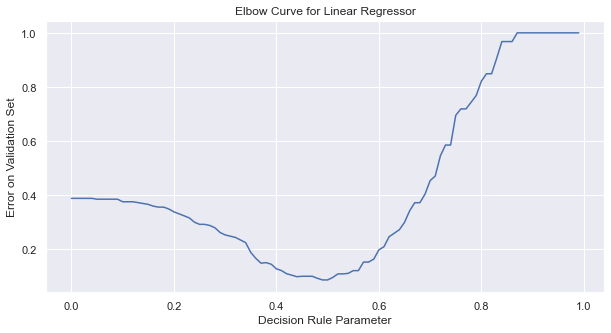

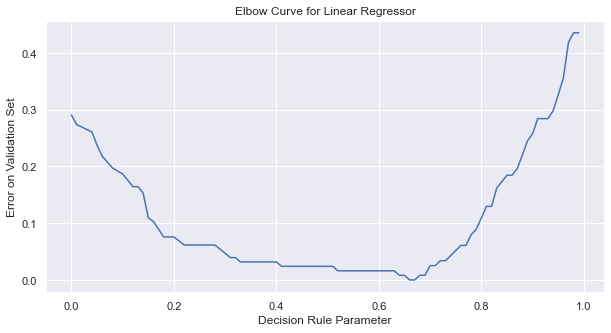

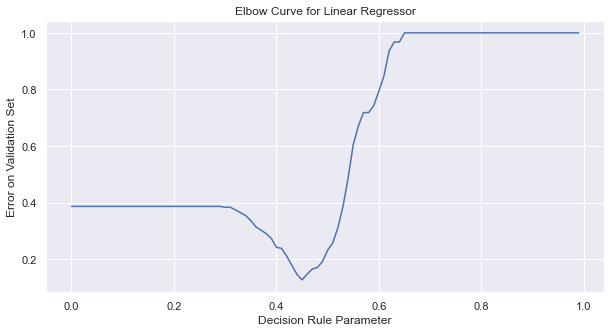

<Figure size 432x288 with 0 Axes>

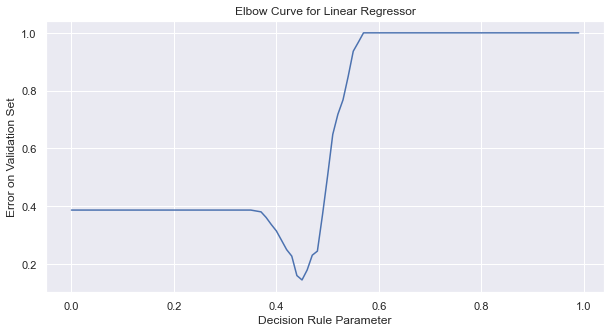

<Figure size 432x288 with 0 Axes>

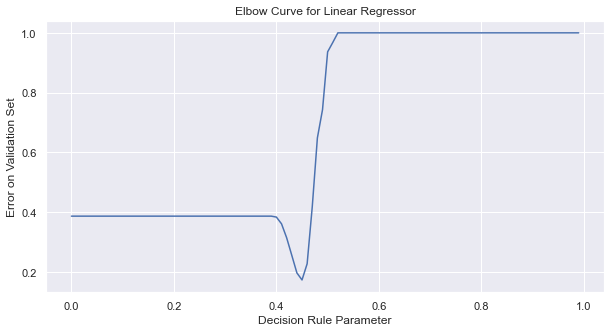

<Figure size 432x288 with 0 Axes>

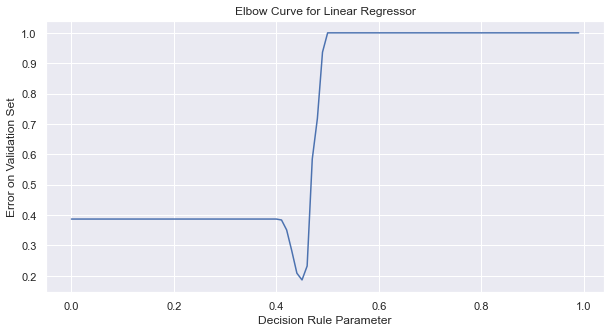

<Figure size 432x288 with 0 Axes>

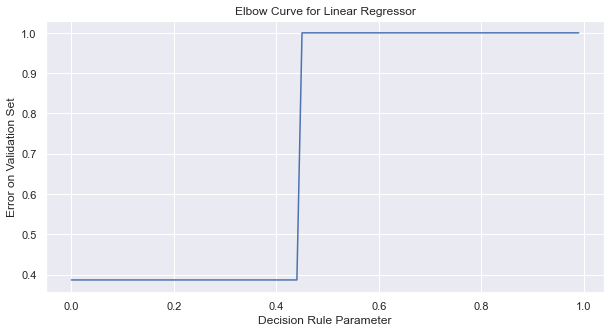

In [37]:
#Implement Ridge Linear Regressor
from sklearn.linear_model import Ridge

#Creating a list of regularisation strength values
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25, 1000]

#Creating empyty lists to store f1 score and recall for ridge regression (with optimal dceision parameter) 
#for each value of alpha:
acc_alpha=[]
f1_alpha=[]

#Running the simulations
def ridge_alpha_max_f1(alpha):
    # Creating instance of Ridge Regresssion
    ridgelr = Ridge(normalize=True, alpha=alpha)
    # Fitting the model
    ridgelr.fit(train_val_x, train_val_y)
    # Predicting over the Validation Set
    valid_predict = ridgelr.predict(valid_x)
    #Decision Rule (By maximising f1 score on the validation set):
    er=[]
    for i in range(0, 100, 1):
        v=i/100
        def func_dec(x):
            if x >= v:
                return 1
            else:
                return 0
        valid_predict_clf=list(map(func_dec, valid_predict))
        er_f1 = 1-f1_score(valid_y, valid_predict_clf)
        er.append(er_f1)
    #Using optimum decision parameter
    j=list(range(0, 100, 1))
    v = list(map(lambda x: x/100, j))
    ridgelr = Ridge(alpha=alpha)
    ridgelr.fit(train_val_x, train_val_y)
    valid_predict = ridgelr.predict(valid_x)
    def func_dec_opt(x):
        if x >= v[er.index(min(er))]:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec_opt, valid_predict))
    acc_alpha.append(accuracy_score(valid_y, valid_predict_clf))
    f1_alpha.append(f1_score(valid_y, valid_predict_clf))
    i=list(range(0, 100, 1))
    v = list(map(lambda x: x/100, i))
    f, ax = plt.subplots(figsize=(10, 5))
    ax.plot(v, er)
    plt.xlabel("Decision Rule Parameter")
    plt.ylabel("Error on Validation Set")
    plt.title("Elbow Curve for Linear Regressor")
    
for i in alpha_ridge:
    plt.figure(i)
    ridge_alpha_max_f1(i)


In [38]:
pd.DataFrame({"Alpha":alpha_ridge, "F1":f1_alpha, "Accuracy":acc_alpha})

,Alpha,F1,Accuracy
0,0.000000e+00,1.000000,1.000000
1,1.000000e-08,1.000000,1.000000
2,1.000000e-04,1.000000,1.000000
3,1.000000e-03,1.000000,1.000000
4,1.000000e-02,0.991870,0.992754
5,1.000000e+00,0.976000,0.978261
6,5.000000e+00,0.976000,0.978261
7,1.000000e+01,0.976000,0.978261
8,2.000000e+01,0.959350,0.963768
9,2.500000e+01,0.935484,0.942029


Text(0, 0.5, 'Accuracy Score')

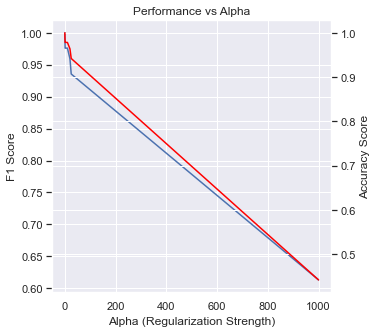

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(alpha_ridge, f1_alpha)
ax.set_xlabel("Alpha (Regularization Strength)")
ax.set_ylabel("F1 Score")
ax.set_title("Performance vs Alpha")
ax2=ax.twinx()
ax2.plot(alpha_ridge, acc_alpha, color="red")
ax2.set_ylabel("Accuracy Score")

Text(0, 0.5, 'Accuracy Score')

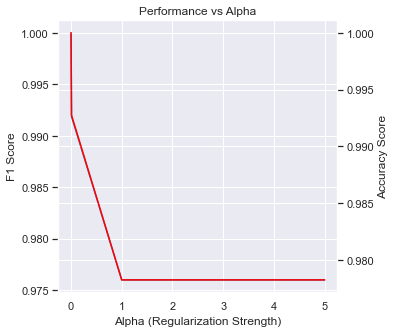

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(alpha_ridge[0:7], f1_alpha[0:7])
ax.set_xlabel("Alpha (Regularization Strength)")
ax.set_ylabel("F1 Score")
ax.set_title("Performance vs Alpha")
ax2=ax.twinx()
ax2.plot(alpha_ridge[0:7], acc_alpha[0:7], color="red")
ax2.set_ylabel("Accuracy Score")

Ridge Regression Coefficients:  [-0.84166658 -0.46694166 -0.18682097 -0.01096958]


Text(0.5, 1.0, 'Coefficient plot')

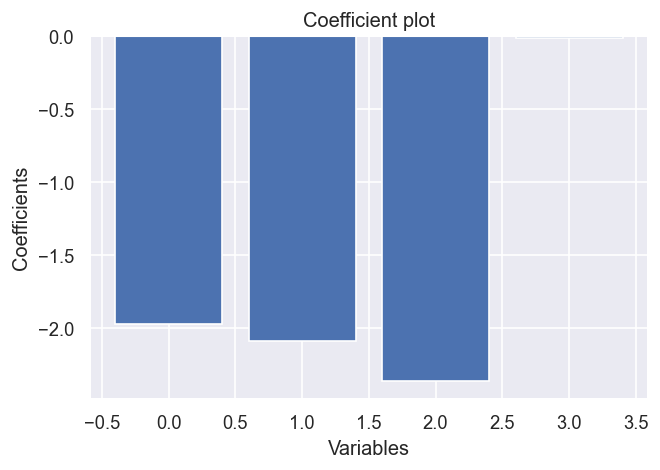

In [41]:
ridgelr = Ridge(normalize=True, alpha=1e-8)
ridgelr.fit(train_val_x, train_val_y)
valid_predict = ridgelr.predict(valid_x)
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)


#Using algorithm on entire train (itrain set) set and looking at coefficients
ridgelr = Ridge(normalize=True, alpha=1)
ridgelr.fit(train_x, train_y)
test_predict = ridgelr.predict(test_x)

print("Ridge Regression Coefficients: ", ridgelr.coef_)

plt.figure(dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Accuracy on Test: 0.7608695652173914 
Recall on Test: 0.45901639344262296 
F1 Score on Test: 0.6292134831460674
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.46      0.63        61
           0       0.70      1.00      0.82        77

    accuracy                           0.76       138
   macro avg       0.85      0.73      0.73       138
weighted avg       0.83      0.76      0.74       138



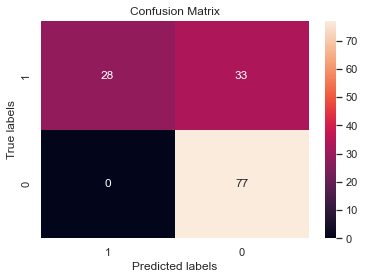

In [42]:
#Using Decision Rule with Optimum Parmeter
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
def func_dec_opt(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec_opt, test_predict))
print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

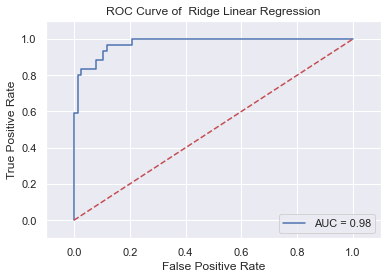

In [43]:
#Ridge Regression ROC Curve:
ridgelr = Ridge(normalize=True, alpha=1)
ridgelr.fit(train_x, train_y)
test_scores = ridgelr.predict(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Ridge Linear Regression')
plt.show()

## IV) Supervised Deep Learning Model: Artificial Neural Network (ANN)

In [51]:
#Packages:
import tensorflow as tf
from sklearn.model_selection import cross_val_score

#defining f1 score and recall score metric
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

np.random.seed(52)
#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer with 1 neuron as it's a classification problem.
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=[f1_metric])
#Binary cross entropy is the loss function we use for classification purposes.
#The popular adam optimizer has been used as a trial.

np.random.seed(52)
#Fitting ANN
ann.fit(train_val_x,train_val_y,batch_size=128,epochs = 100)
#Used a mini batch gradient descent for trial, 32 is a popular batch size and each training sample will be use 100 times.


Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7132 - f1_metric: 0.4799
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7050 - f1_metric: 0.4010
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6978 - f1_metric: 0.1240
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6923 - f1_metric: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6877 - f1_metric: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6837 - f1_metric: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6795 - f1_metric: 0.0000e+00
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6758 - f1_metric: 0.0000e+00
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6721 - f1_metric: 0.0000e+00
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6686 - f1_metric: 0.

9/9 [==============================] - 0s 3ms/step - loss: 0.3724 - f1_metric: 0.8972
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3680 - f1_metric: 0.9086
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3633 - f1_metric: 0.9145
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3588 - f1_metric: 0.9219
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3543 - f1_metric: 0.9236
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3499 - f1_metric: 0.9262
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3456 - f1_metric: 0.9303
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3414 - f1_metric: 0.9285
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3371 - f1_metric: 0.9255
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3331 - f1_metric: 0.9348
Epoch 92/100
9/9 [=====

In [52]:
#ANN Classifier
valid_predict = ann.predict(valid_x)

Text(0.5, 1.0, 'Elbow Curve for ANN')

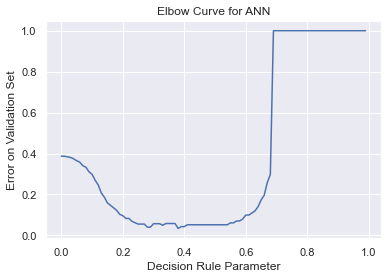

In [53]:
#Decision Rule (By maximising f1 score on the validation set):
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)
    
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
plt.plot(v, er)
plt.xlabel("Decision Rule Parameter")
plt.ylabel("Error on Validation Set")
plt.title("Elbow Curve for ANN")

In [54]:
#Making Final Predictions and evaluating performance
np.random.seed(52)
ann.fit(train_x, train_y,batch_size=128,epochs = 100)
test_predict = ann.predict(test_x)

#Using Decision Rule with Optimum Parameter:
def func_dec_opt(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0

test_predict_clf=list(map(func_dec_opt, test_predict))

print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2952 - f1_metric: 0.9490
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2914 - f1_metric: 0.9503
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2876 - f1_metric: 0.9521
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2839 - f1_metric: 0.9505
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2804 - f1_metric: 0.9539
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2768 - f1_metric: 0.9543
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2734 - f1_metric: 0.9548
Epoch 8/100
10/10 [==============================] - ETA: 0s - loss: 0.2715 - f1_metric: 0.962 - 0s 2ms/step - loss: 0.2699 - f1_metric: 0.9592
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2666 - f1_metric: 0.9604
Epoch 10/100
10/10 [==============================] - 0s

10/10 [==============================] - 0s 3ms/step - loss: 0.1281 - f1_metric: 0.9919
Epoch 82/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1271 - f1_metric: 0.9937
Epoch 83/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1261 - f1_metric: 0.9946
Epoch 84/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1250 - f1_metric: 0.9939
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1239 - f1_metric: 0.9950
Epoch 86/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1229 - f1_metric: 0.9944
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1219 - f1_metric: 0.9944
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1209 - f1_metric: 0.9949
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1200 - f1_metric: 0.9946
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1190 - f1_metric: 0.9946
Epo

Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        61
           0       1.00      0.95      0.97        77

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



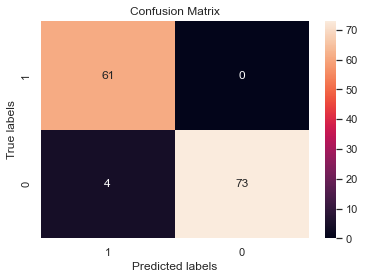

In [48]:
#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

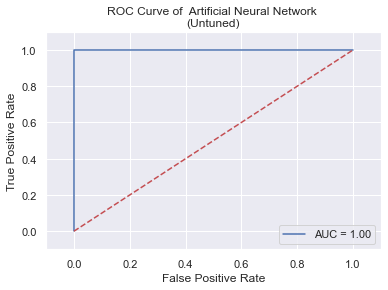

In [55]:
fpr, tpr, threshold = roc_curve(test_y, test_predict)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Artificial Neural Network \n(Untuned)')
plt.show()

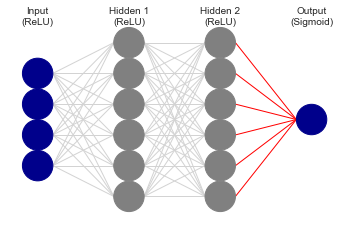

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [50]:
from nnv import NNV

layersList = [
    {"title":"Input\n(ReLU)", "units": 4, "color": "darkBlue", "edges_width":1},
    {"title":"Hidden 1\n(ReLU)", "units": 6, "edges_width":1},
    {"title":"Hidden 2\n(ReLU)", "units": 6, "edges_color":"red", "edges_width":1},
    {"title":"Output\n(Sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList, max_num_nodes_visible=8, node_radius=50, spacing_layer=200, font_size=10).render()